<a href="https://colab.research.google.com/github/PabloJRW/medical-insurance-neural-network-model/blob/main/Insurance_Forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [109]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import make_column_transformer
import tensorflow as tf

In [110]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [111]:
# Insurance data description
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [112]:
# Create training and test sets
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
len(X_train), len(X_test), len(y_train), len(y_test)

(1070, 268, 1070, 268)

In [113]:
# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]),
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Fit the column transformer
ct.fit(X_train)

# Transform train and test sets 
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

## Building models...

### Model 1
Model trained on Adam optimizer(learning_rate=default), two hidden layers.

In [114]:
# Build a neural network model to fit on our normalized data
tf.random.set_seed(42)

# This callback will stop the training when there is no improvement in
# the loss for three consecutive epochs.
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

# 1. Create the model
insurance_model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_1.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit the model
history = insurance_model_1.fit(X_train_normal, 
                      y_train, 
                      epochs=200,
                      callbacks=[callback])

Epoch 1/200
34/34 [==============================] - 0s 3ms/step - loss: 13385.8477 - mae: 13385.8477
Epoch 2/200
34/34 [==============================] - 0s 3ms/step - loss: 13372.6963 - mae: 13372.6963
Epoch 3/200
34/34 [==============================] - 0s 3ms/step - loss: 13320.9062 - mae: 13320.9062
Epoch 4/200
34/34 [==============================] - 0s 3ms/step - loss: 13181.3115 - mae: 13181.3115
Epoch 5/200
34/34 [==============================] - 0s 3ms/step - loss: 12898.0439 - mae: 12898.0439
Epoch 6/200
34/34 [==============================] - 0s 3ms/step - loss: 12418.6328 - mae: 12418.6328
Epoch 7/200
34/34 [==============================] - 0s 3ms/step - loss: 11701.1846 - mae: 11701.1846
Epoch 8/200
34/34 [==============================] - 0s 3ms/step - loss: 10822.3887 - mae: 10822.3887
Epoch 9/200
34/34 [==============================] - 0s 3ms/step - loss: 9948.9287 - mae: 9948.9287
Epoch 10/200
34/34 [==============================] - 0s 3ms/step - loss: 9177.9473 

In [115]:
mae_model_1 = insurance_model_1.evaluate(X_test_normal, y_test)[1]

9/9 [==============================] - 0s 3ms/step - loss: 2899.4919 - mae: 2899.4919


### Model 2

This time increasing the learning rate to 0.01

In [116]:
# Build a neural network model to fit on our normalizaed data
tf.random.set_seed(42)

# This callback will stop the training when there is no improvement in
# the loss for three consecutive epochs.
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

# 1. Create the model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                          metrics=["mae"])

# 3. Fit the model
history_2 = insurance_model_2.fit(X_train_normal, 
                      y_train, 
                      epochs=200,
                      callbacks=[callback])

Epoch 1/200
34/34 [==============================] - 0s 3ms/step - loss: 13102.4180 - mae: 13102.4180
Epoch 2/200
34/34 [==============================] - 0s 3ms/step - loss: 9300.6650 - mae: 9300.6650
Epoch 3/200
34/34 [==============================] - 0s 3ms/step - loss: 7694.4922 - mae: 7694.4922
Epoch 4/200
34/34 [==============================] - 0s 3ms/step - loss: 6723.2495 - mae: 6723.2495
Epoch 5/200
34/34 [==============================] - 0s 3ms/step - loss: 5031.3560 - mae: 5031.3560
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 3713.8586 - mae: 3713.8586
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 3502.3557 - mae: 3502.3557
Epoch 8/200
34/34 [==============================] - 0s 3ms/step - loss: 3335.1130 - mae: 3335.1130
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 3249.0239 - mae: 3249.0239
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 3219.5698 - mae: 3219.56

In [117]:
mae_model_2 = insurance_model_2.evaluate(X_test_normal, y_test)[1]

9/9 [==============================] - 0s 2ms/step - loss: 1729.8170 - mae: 1729.8170


### Model 3
This time training on same learning rate(0.01) but adding a hidden layer.

In [118]:
# Build a neural network model to fit on our normalizaed data
tf.random.set_seed(42)

# This callback will stop the training when there is no improvement in
# the loss for three consecutive epochs.
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

# 1. Create the model
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                          metrics=["mae"])

# 3. Fit the model
history_3 = insurance_model_3.fit(X_train_normal, 
                      y_train, 
                      epochs=200,
                      callbacks=[callback])


Epoch 1/200
34/34 [==============================] - 1s 3ms/step - loss: 11441.9316 - mae: 11441.9316
Epoch 2/200
34/34 [==============================] - 0s 3ms/step - loss: 6914.1777 - mae: 6914.1777
Epoch 3/200
34/34 [==============================] - 0s 3ms/step - loss: 3922.8506 - mae: 3922.8506
Epoch 4/200
34/34 [==============================] - 0s 3ms/step - loss: 3451.9951 - mae: 3451.9951
Epoch 5/200
34/34 [==============================] - 0s 3ms/step - loss: 3345.5635 - mae: 3345.5635
Epoch 6/200
34/34 [==============================] - 0s 3ms/step - loss: 3252.6936 - mae: 3252.6936
Epoch 7/200
34/34 [==============================] - 0s 3ms/step - loss: 3312.9570 - mae: 3312.9570
Epoch 8/200
34/34 [==============================] - 0s 3ms/step - loss: 3210.8909 - mae: 3210.8909
Epoch 9/200
34/34 [==============================] - 0s 3ms/step - loss: 3124.5842 - mae: 3124.5842
Epoch 10/200
34/34 [==============================] - 0s 3ms/step - loss: 3089.8235 - mae: 3089.82

In [119]:
mae_model_3 = insurance_model_3.evaluate(X_test_normal, y_test)[1]

9/9 [==============================] - 0s 2ms/step - loss: 1802.8625 - mae: 1802.8625


## Model 4
Model trained on RMSprop optimizer, two hidden layers

In [120]:
# Build a neural network model to fit on our normalizaed data
tf.random.set_seed(42)

# This callback will stop the training when there is no improvement in
# the loss for three consecutive epochs.
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

# 1. Create the model
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.RMSprop(),
                          metrics=["mae"])

# 3. Fit the model
history_4 = insurance_model_4.fit(X_train_normal, 
                      y_train, 
                      epochs=200,
                      callbacks=[callback])

Epoch 1/200
34/34 [==============================] - 1s 4ms/step - loss: 13383.1553 - mae: 13383.1553
Epoch 2/200
34/34 [==============================] - 0s 3ms/step - loss: 13362.3340 - mae: 13362.3340
Epoch 3/200
34/34 [==============================] - 0s 3ms/step - loss: 13317.3955 - mae: 13317.3955
Epoch 4/200
34/34 [==============================] - 0s 3ms/step - loss: 13241.0801 - mae: 13241.0801
Epoch 5/200
34/34 [==============================] - 0s 3ms/step - loss: 13126.8574 - mae: 13126.8574
Epoch 6/200
34/34 [==============================] - 0s 3ms/step - loss: 12968.7773 - mae: 12968.7773
Epoch 7/200
34/34 [==============================] - 0s 3ms/step - loss: 12760.9678 - mae: 12760.9678
Epoch 8/200
34/34 [==============================] - 0s 3ms/step - loss: 12496.6406 - mae: 12496.6406
Epoch 9/200
34/34 [==============================] - 0s 3ms/step - loss: 12170.1094 - mae: 12170.1094
Epoch 10/200
34/34 [==============================] - 0s 5ms/step - loss: 11780.72

In [121]:
mae_model_4 = insurance_model_4.evaluate(X_test_normal, y_test)[1]

9/9 [==============================] - 0s 2ms/step - loss: 2921.2258 - mae: 2921.2258


## Model 5

In [122]:
# Build a neural network model to fit on our normalizaed data
tf.random.set_seed(42)

# This callback will stop the training when there is no improvement in
# the loss for three consecutive epochs.
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

# 1. Create the model
insurance_model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_5.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.01),
                          metrics=["mae"])

# 3. Fit the model
history_5 = insurance_model_5.fit(X_train_normal, 
                      y_train, 
                      epochs=200,
                      callbacks=[callback])

Epoch 1/200
34/34 [==============================] - 1s 3ms/step - loss: 11789.3291 - mae: 11789.3291
Epoch 2/200
34/34 [==============================] - 0s 3ms/step - loss: 8125.4663 - mae: 8125.4663
Epoch 3/200
34/34 [==============================] - 0s 3ms/step - loss: 7319.2148 - mae: 7319.2148
Epoch 4/200
34/34 [==============================] - 0s 3ms/step - loss: 6207.1685 - mae: 6207.1685
Epoch 5/200
34/34 [==============================] - 0s 4ms/step - loss: 4496.8774 - mae: 4496.8774
Epoch 6/200
34/34 [==============================] - 0s 3ms/step - loss: 3687.3169 - mae: 3687.3169
Epoch 7/200
34/34 [==============================] - 0s 3ms/step - loss: 3566.6111 - mae: 3566.6111
Epoch 8/200
34/34 [==============================] - 0s 3ms/step - loss: 3451.1875 - mae: 3451.1875
Epoch 9/200
34/34 [==============================] - 0s 3ms/step - loss: 3372.9097 - mae: 3372.9097
Epoch 10/200
34/34 [==============================] - 0s 3ms/step - loss: 3315.4753 - mae: 3315.47

In [123]:
mae_model_5 = insurance_model_5.evaluate(X_test_normal, y_test)[1]

9/9 [==============================] - 0s 2ms/step - loss: 1901.3934 - mae: 1901.3934


## Comparing models...

In [126]:
model_results = [["model_1", round(mae_model_1, 2)],
                 ["model_2", round(mae_model_2, 2)],
                 ["model_3", round(mae_model_3, 2)],
                 ["model_4", round(mae_model_4, 2)],
                 ["model_5", round(mae_model_5, 2)]]

pd.DataFrame(model_results, columns=["model", "mae"]).sort_values(by="mae")

,model,mae
1,model_2,1729.82
2,model_3,1802.86
4,model_5,1901.39
0,model_1,2899.49
3,model_4,2921.23


## Saving the best model

In [127]:
# Best model
insurance_model = insurance_model_2

# Saving the model
insurance_model.save("insurance_model.h5")

Text(0, 0.5, 'loss')

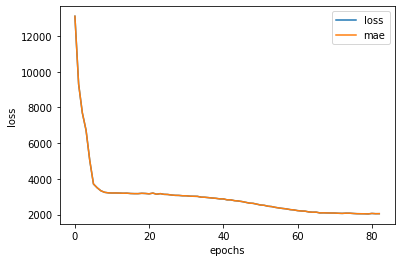

In [128]:
pd.DataFrame(history_2.history).plot()
plt.xlabel("epochs")
plt.ylabel("loss")